In [12]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) =reuters.load_data(num_words=10000)

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=46, activation='softmax'))

2023-12-16 14:07:46.324274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1091 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:2b:00.0, compute capability: 8.9


In [5]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [9]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 11ms/step - loss: 0.1274 - accuracy: 0.9584 - val_loss: 0.9540 - val_accuracy: 0.8170
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1268 - accuracy: 0.9564 - val_loss: 0.9503 - val_accuracy: 0.8160
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1242 - accuracy: 0.9564 - val_loss: 0.9647 - val_accuracy: 0.8160
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1211 - accuracy: 0.9567 - val_loss: 0.9453 - val_accuracy: 0.8180
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1139 - accuracy: 0.9578 - val_loss: 0.9914 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1134 - accuracy: 0.9603 - val_loss: 0.9629 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1109 - accuracy: 0.9587 - val_loss: 0.9683 - val_accuracy: 0.8090
Epoch 8/20
16/16 [=

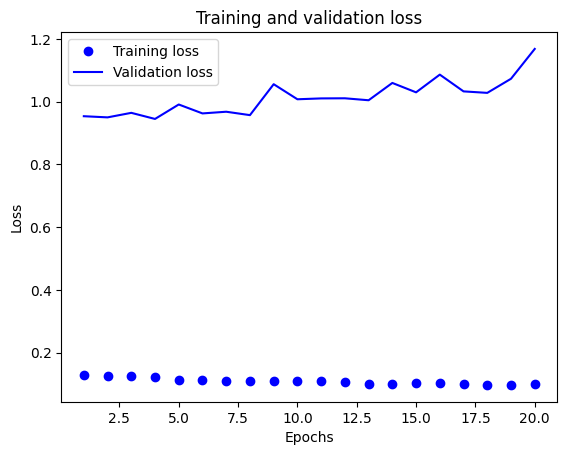

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt